In [1]:
import AAnet
import network
import numpy as np
import AAtools
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
import tensorflow as tf
import time
import pickle

In [2]:
# load frey faces
f = open('/Users/david/Dropbox/ARGAN/python/frey/freyfaces.pkl','rb')
data = pickle.load(f, encoding='latin1')
f.close()
data = np.array(data, dtype='f')    # float32
data = 1 - data
data = (data * 2) - 1 # normaslize for tanh

In [31]:
# params
num_at = 7
noise_z_std = 0.2
z_dim = [256,128,64]
#z_dim = [] # linear AA
act_out = tf.nn.tanh
#act_out = None # linear last layer
input_dim = data.shape[1]

In [32]:
# network
#enc_net = network.Encoder(num_at=num_at, z_dim=z_dim)
#dec_net = network.Decoder(x_dim=input_dim, noise_z_std=noise_z_std, z_dim=z_dim, act_out=act_out)
enc_net = network.FreyConvEncoder(num_at=num_at)
dec_net = network.FreyConvDecoder(x_dim=input_dim, noise_z_std=noise_z_std, act_out=act_out)
model = AAnet.AAnet(enc_net, dec_net)

In [33]:
# train
model.train(data, batch_size=64, num_batches=10000)

Iter [       0] Time [0.4464] loss [1.9326]
Iter [     500] Time [20.5179] loss [0.5472]
Iter [    1000] Time [40.4149] loss [0.0683]
Iter [    1500] Time [60.2390] loss [0.1092]
Iter [    2000] Time [80.1905] loss [0.0426]
Iter [    2500] Time [100.0461] loss [0.0365]
Iter [    3000] Time [119.9141] loss [0.0322]
Iter [    3500] Time [139.6778] loss [0.0487]
Iter [    4000] Time [159.5737] loss [0.1186]
Iter [    4500] Time [179.1021] loss [0.0267]
Iter [    5000] Time [198.5951] loss [0.0331]
Iter [    5500] Time [217.7706] loss [0.0258]
Iter [    6000] Time [237.1787] loss [0.0750]
Iter [    6500] Time [256.6277] loss [0.0241]
Iter [    7000] Time [276.1319] loss [0.0219]
Iter [    7500] Time [295.7591] loss [0.0241]
Iter [    8000] Time [315.4402] loss [0.0234]
Iter [    8500] Time [335.1407] loss [0.0278]
Iter [    9000] Time [354.8375] loss [0.0367]
Iter [    9500] Time [374.5011] loss [0.0557]
Iter [    9999] Time [394.2165] loss [0.0221]
done.


In [34]:
loss_data = model.compute_loss(data)
print('loss: %.4f' % loss_data)

loss: 0.0214


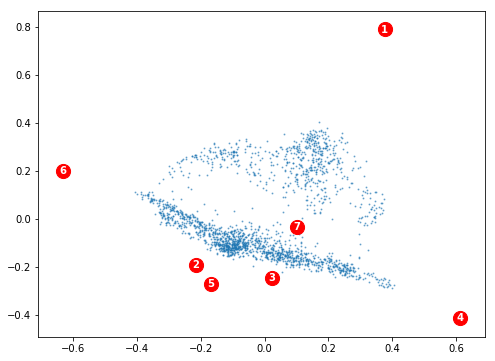

In [35]:
model.plot_at_pca_single(data)

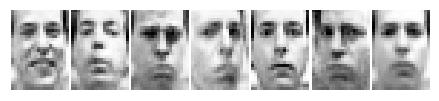

In [36]:
# plot ATs
ats_x = model.get_ats_x()
AAtools.plot_frey(ats_x)

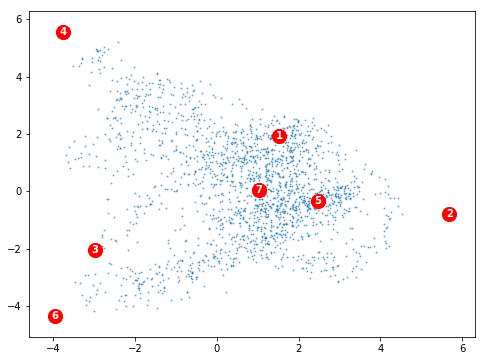

In [37]:
model.plot_pca_ats_data(data)

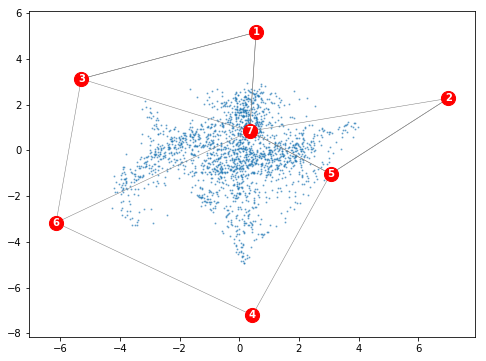

In [38]:
model.plot_at_mds(data)

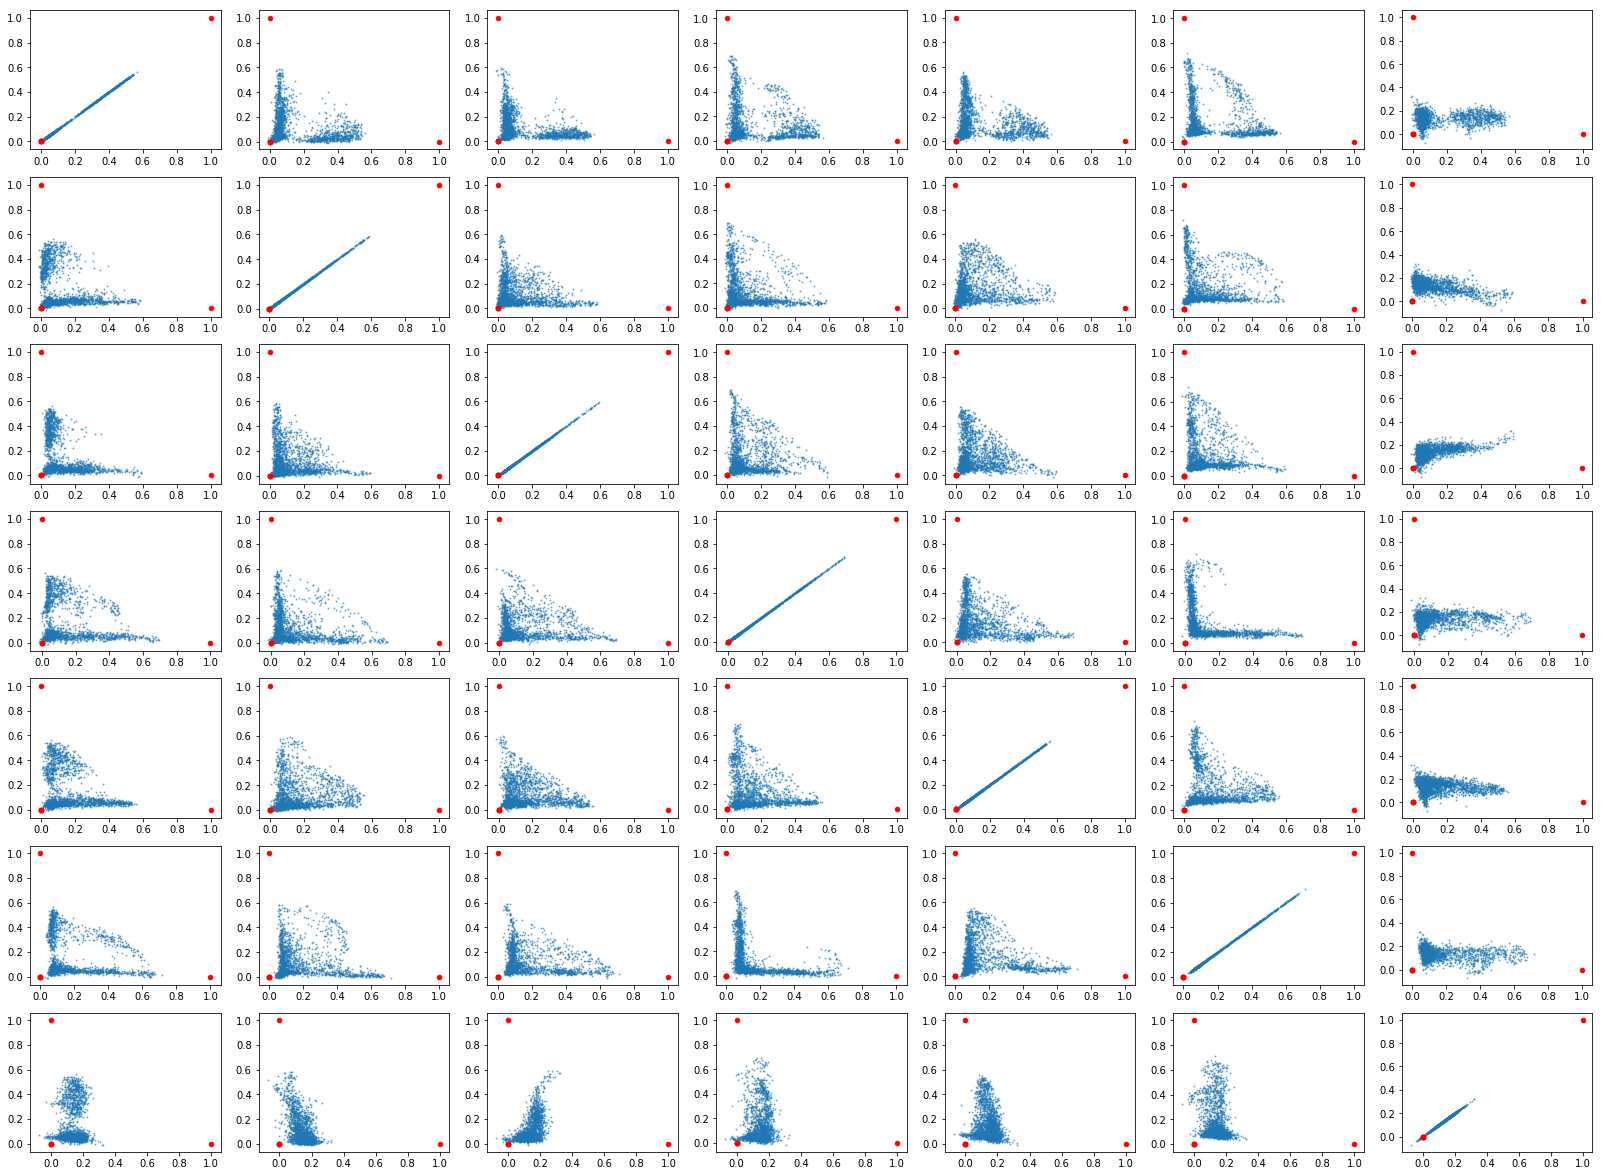

In [39]:
model.plot_at(data)

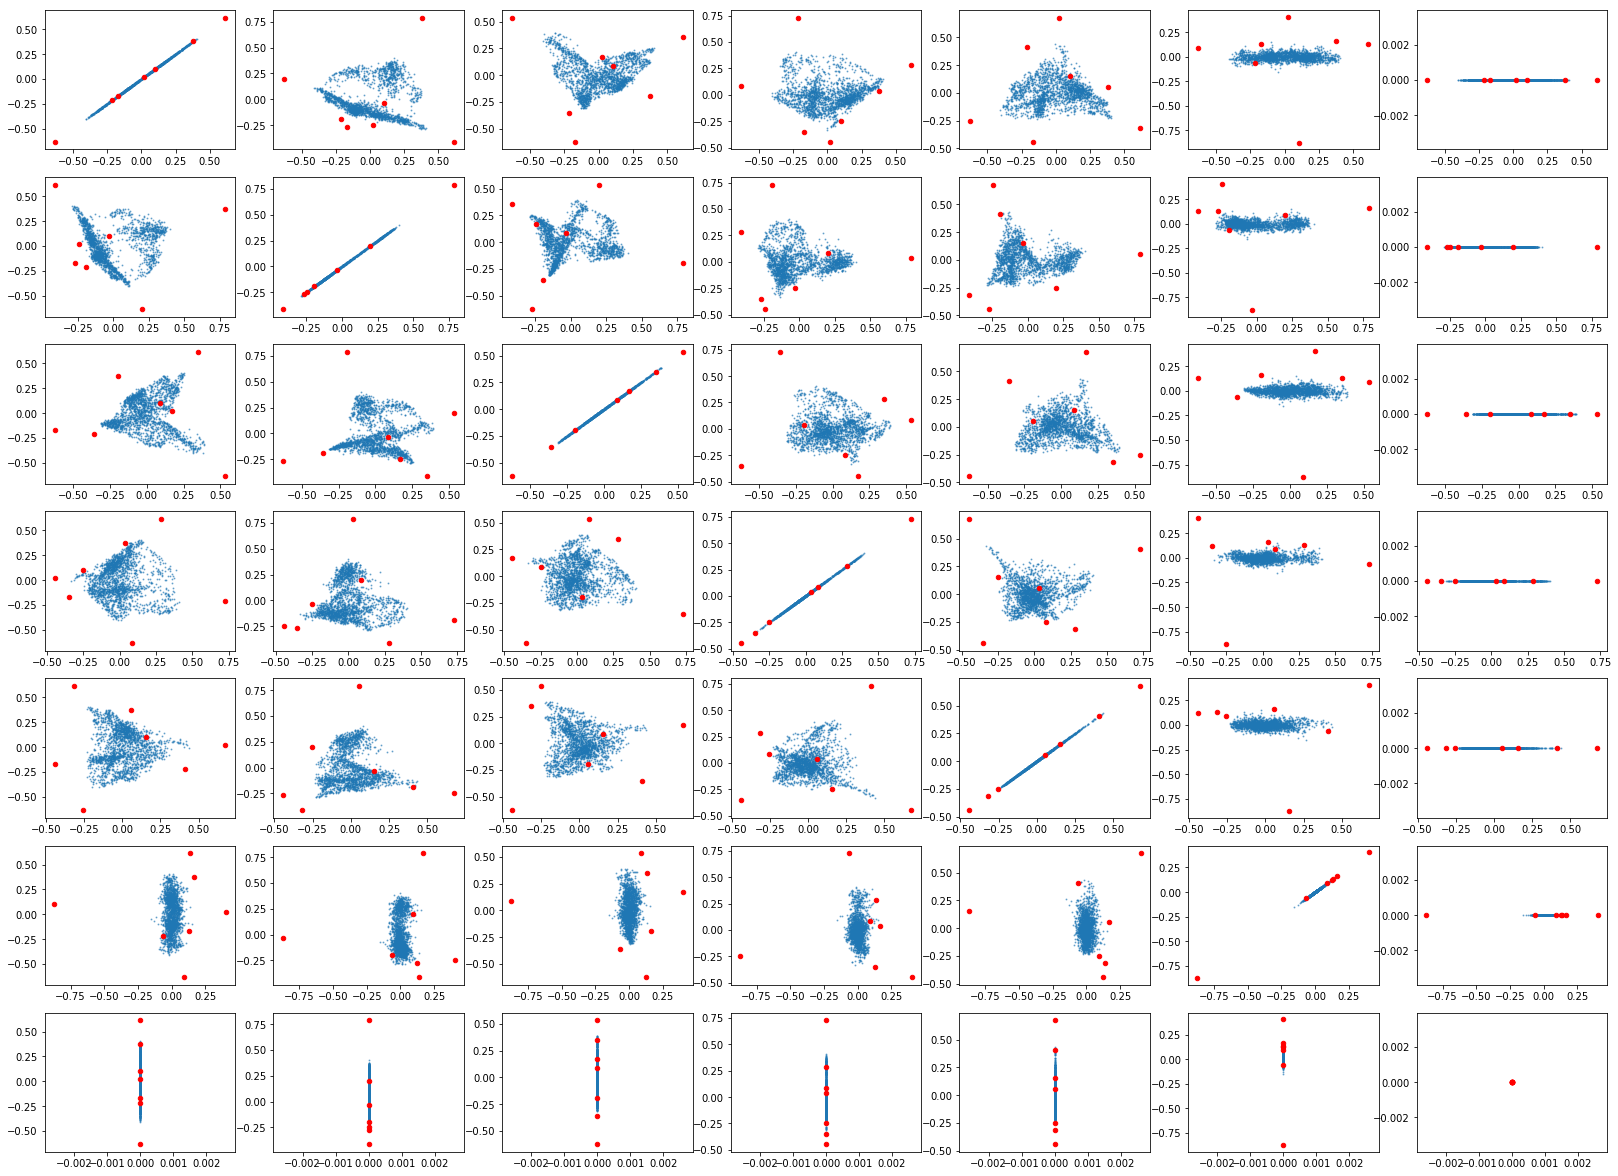

In [40]:
model.plot_at_pca(data)

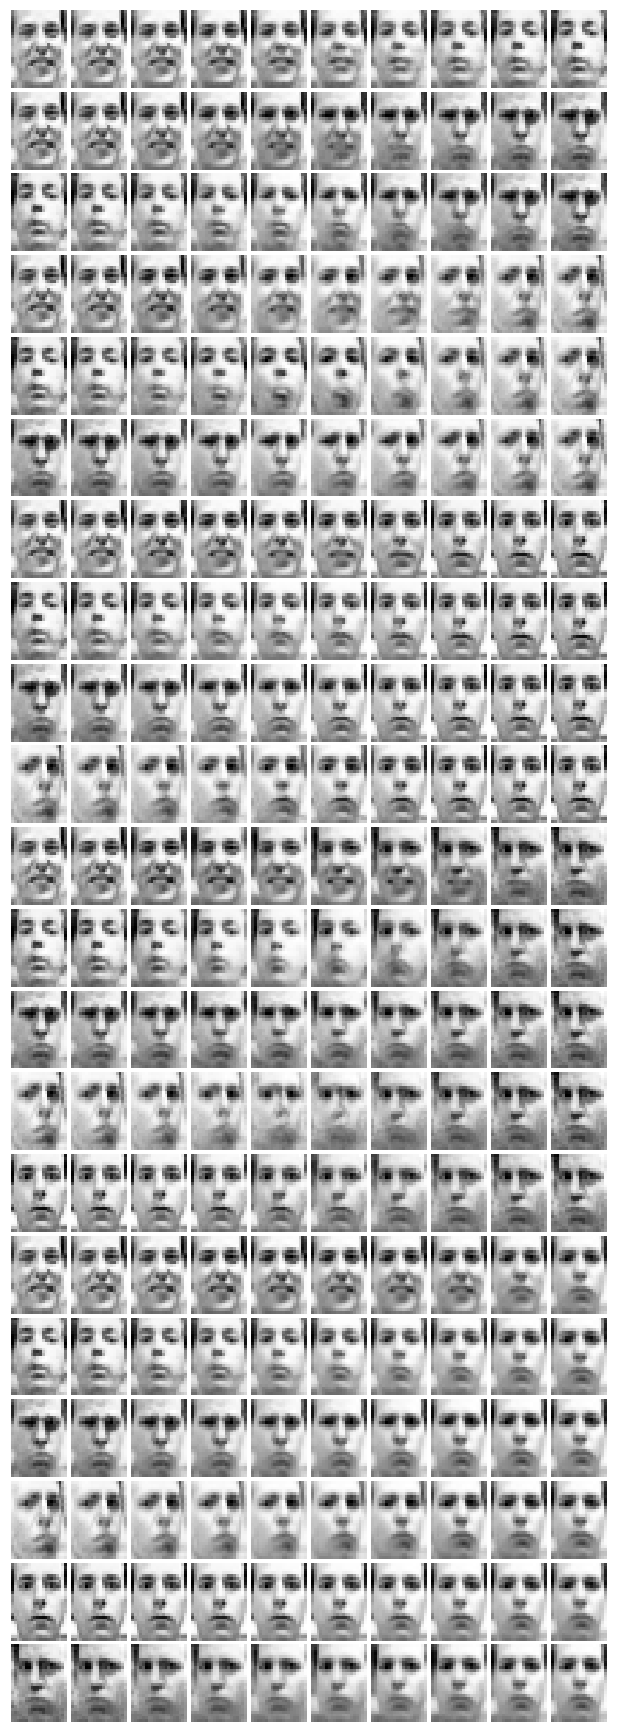

In [41]:
# at scan
samples_at = model.at_scan(10)
samples_x = model.at2data(samples_at)
AAtools.plot_frey(samples_x, nc=10)

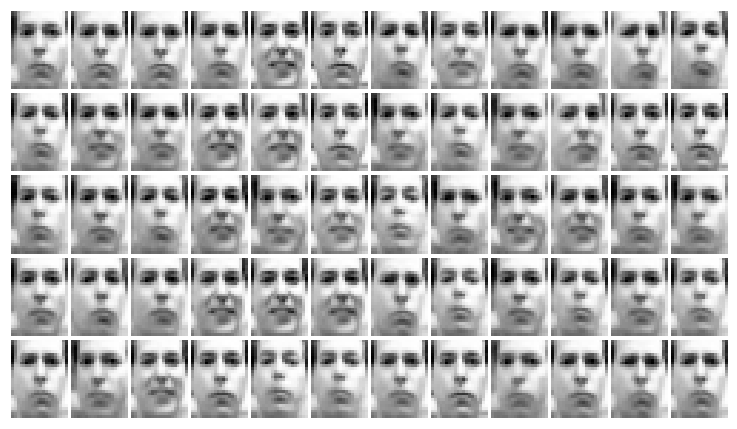

In [42]:
# sample from z uniform random
samples_at = model.sample_at_uniform(60)
samples_x = model.at2data(samples_at)
AAtools.plot_frey(samples_x, nc=12)